In [8]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def use_svg_display():  
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)): 
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

# 练习部分

1.绘制函数 𝑦=𝑓(𝑥)=𝑥3−1𝑥
 和其在 𝑥=1
 处切线的图像。

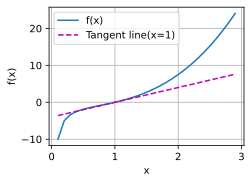

In [12]:
x = np.arange(0.1, 3, 0.1)
def f(x):
    return x**3-x**-1
plot(x,[f(x),4*x-4],'x','f(x)',legend=['f(x)','Tangent line(x=1)'])

2.求函数 𝑓(𝐱)=3𝑥21+5𝑒𝑥2
 的梯度。

In [15]:
def gradient(x):
    x1, x2 = x
    dfdx1 = 6 * x1
    dfdx2 = 5*np.exp(x2)
    return np.array([dfdx1, dfdx2])


3.函数 𝑓(𝐱)=‖𝐱‖2
 的梯度是什么

[2x1,2x2,...,2xn]

4.尝试写出函数 𝑢=𝑓(𝑥,𝑦,𝑧)
 ，其中 𝑥=𝑥(𝑎,𝑏)
 ， 𝑦=𝑦(𝑎,𝑏)
 ， 𝑧=𝑧(𝑎,𝑏)
 的链式法则。

In [17]:
def chain_rule(partial_f_partial_x, partial_f_partial_y, partial_f_partial_z,
               partial_x_partial_a, partial_x_partial_b,
               partial_y_partial_a, partial_y_partial_b,
               partial_z_partial_a, partial_z_partial_b):
    partial_u_partial_a = (partial_f_partial_x * partial_x_partial_a +
                           partial_f_partial_y * partial_y_partial_a +
                           partial_f_partial_z * partial_z_partial_a)
    partial_u_partial_b = (partial_f_partial_x * partial_x_partial_b +
                           partial_f_partial_y * partial_y_partial_b +
                           partial_f_partial_z *partial_z_partial_b)
